In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import math
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import scipy
from scipy.optimize import curve_fit
import ROOT
from root_numpy import fill_hist
from mpl_toolkits.mplot3d import Axes3D

Welcome to JupyROOT 6.24/06


In [15]:
#file_1 = uproot.open("./MuonGun/CSCME11_2TeV.root")
file_1 = uproot.open("./MuonGun/CSCME11_1TeV.root")

#file_2   = uproot.open("./MuonGun/p1TeV_global.root")
#file_1  = uproot.open("./MuonGun/p02TeV_global.root")

In [16]:
file_1.keys()

['Muons;23', 'Muons;22', 'Muons;21']

In [17]:
tree_1 = file_1["Muons"]

In [18]:
ntupla_1 = tree_1.arrays(tree_1.keys())
print(tree_1.keys())

['isLoose', 'isTight', 'isHighPtMuonID', 'isTrackerHighPtMuonID', 'pt', 'pt_err', 'eta', 'phi', 'p', 'pt_gen', 'p_gen', 'deltaR_recogen', 'nHitsCSC', 'nSeg', 'nHits_perSeg', 'recoSeg_x', 'recoSeg_y', 'recoSeg_Err_xx', 'recoSeg_Err_xy', 'recoSeg_Err_yy', 'recoSeg_dx', 'recoSeg_dy', 'recoSeg_dz', 'recoSeg_Err_dxdzdxdz', 'recoSeg_Err_dxdzdydz', 'recoSeg_Err_dydzdydz', 'resSeg', 'pullSeg', 'recoHits_x', 'recoHits_y', 'recoHits_xGlobal', 'recoHits_yGlobal', 'recoHits_Err_xx', 'recoHits_Err_xy', 'recoHits_Err_yy', 'ringID', 'stationID', 'chamberID', 'layerID', 'zendcapID', 'simHits_x', 'simHits_y', 'simHits_dx', 'simHits_dy', 'simHits_dz', 'z_layer', 'MUrecoHits_x', 'MUrecoHits_y', 'MUrecoHits_Err_xx', 'MUrecoHits_Err_xy', 'MUrecoHits_Err_yy', 'MUringID', 'MUstationID', 'MUchamberID', 'MUlayerID', 'MUzendcapID']


In [19]:
muons_1 = ak.zip({
            "p"                     : ntupla_1.p,
            "pGen"                  : ntupla_1.p_gen,
            "pt"                    : ntupla_1.pt,
            "ptErr"                 : ntupla_1.pt_err,
            "ptGen"                 : ntupla_1.pt_gen,
            "phi"                   : ntupla_1.phi,
            "eta"                   : ntupla_1.eta,
            "isTight"               : ntupla_1.isTight,
            "isHighPtMuonID"        : ntupla_1.isHighPtMuonID,
            "isTrackerHighPtMuonID" : ntupla_1.isTrackerHighPtMuonID,
            "nSeg"                  : ntupla_1.nSeg
             }, with_name="MuonCandidate1")

In [20]:
segments_1 = ak.zip({
                "nHits"              : ntupla_1.nHits_perSeg,
                "x"                  : ntupla_1.recoSeg_x,
                "y"                  : ntupla_1.recoSeg_y,
                "xErr"               : ntupla_1.recoSeg_Err_xx,
                "yErr"               : ntupla_1.recoSeg_Err_yy,
                "dx"                 : ntupla_1.recoSeg_dx,
                "dy"                 : ntupla_1.recoSeg_dy,
                "dz"                 : ntupla_1.recoSeg_dz,
                "dirxErr"            : ntupla_1.recoSeg_Err_dxdzdxdz,
                "diryErr"            : ntupla_1.recoSeg_Err_dydzdydz,
                "pull"               : ntupla_1.pullSeg,
                "res"                : ntupla_1.resSeg
                })

In [21]:
hits_1 = ak.zip({
                "x"                  : ntupla_1.recoHits_x,
                "y"                  : ntupla_1.recoHits_y,
                "xErr"               : ntupla_1.recoHits_Err_xx,
                "yErr"               : ntupla_1.recoHits_Err_yy,
                "xSim"               : ntupla_1.simHits_x,
                "ySim"               : ntupla_1.simHits_y,
                "dxSim"              : ntupla_1.simHits_dx,
                "dySim"              : ntupla_1.simHits_dy,
                "dzSim"              : ntupla_1.simHits_dz,
                "zLayer"             : ntupla_1.z_layer,
                "ring"               : ntupla_1.ringID,
                "station"            : ntupla_1.stationID,
                "chamber"            : ntupla_1.chamberID,
                "layer"              : ntupla_1.layerID,
                "endcap"             : ntupla_1.zendcapID,
                })

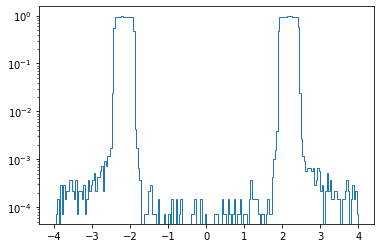

In [22]:
plt.hist(ak.flatten(muons_1.eta,axis=None),label='p = 2 TeV',histtype=("step"), bins=200,range=(-4,4),density = True)
plt.yscale('log')

In [78]:
hits_1.layer

<Array [[[1, 6, 2, 3, 4, ... 1, 5, 4, 3, 2]]] type='351324 * var * var * int64'>

(array([7.35962978e-06, 7.94840016e-06, 9.42032612e-06, 9.71471131e-06,
        9.71471131e-06, 9.12594093e-06, 7.06524459e-06, 7.65401497e-06,
        9.12594093e-06, 9.42032612e-06, 1.11866373e-05, 7.94840016e-06,
        7.06524459e-06, 8.83155574e-06, 6.47647421e-06, 6.77085940e-06,
        5.88770382e-06, 6.18208902e-06, 7.35962978e-06, 6.47647421e-06,
        9.71471131e-06, 1.14810225e-05, 1.23641780e-05, 1.05978669e-05,
        8.83155574e-06, 1.17754076e-05, 1.14810225e-05, 1.67799559e-05,
        1.47192596e-05, 1.64855707e-05, 1.61911855e-05, 2.00181930e-05,
        1.88406522e-05, 2.06069634e-05, 2.11957338e-05, 2.14901190e-05,
        2.67890524e-05, 3.14992155e-05, 3.56206081e-05, 3.67981489e-05,
        4.50409343e-05, 4.18026972e-05, 4.94567121e-05, 5.03398677e-05,
        7.03580607e-05, 6.88861348e-05, 7.44794534e-05, 8.12503128e-05,
        9.56751872e-05, 1.02151661e-04, 1.15104610e-04, 1.31590180e-04,
        1.30707025e-04, 1.50136448e-04, 1.63383781e-04, 1.854626

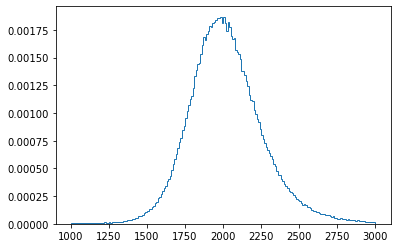

In [11]:
plt.hist(ak.flatten(muons_1.p,axis=None),label='p = 2 TeV',histtype=("step"), bins=200,range=(1000,3000),density = True)

In [29]:
segments_1.x[0]

<Array [-9.2, 3.57, -3.89, -4.24] type='4 * float64'>

In [30]:
for item in hits_1.x[0][1]:
    print(item)
    print(abs(item-segments_1.x[0][1])/abs(item))
ak.num(hits_1.x,axis=2)

3.928579330444336
0.09012368021276812
3.534592628479004
0.011296542174665818
3.4512810707092285
0.03570854704172959
3.212282180786133
0.11276690589557649
3.518824338912964
0.01582828777441102
3.561062812805176
0.003779346526354128


<Array [[6, 6, 6, 6], [6, ... 6, 5, 6], [6, 6]] type='351324 * var * int64'>

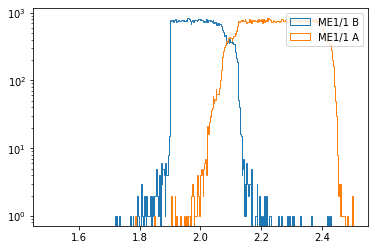

In [23]:
mask_hit = (hits_1.station == 1) & (hits_1.ring == 1)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
mask_muon = (ak.num(segments_1[mask_segment],axis=1) > 0)
muon_skim_1 = muons_1[mask_muon]
n, bins, _ = plt.hist(muon_skim_1.eta,label='ME1/1 B',histtype=("step"), bins=400,range=(1.5,2.5))#,density = True)

mask_hit = (hits_1.station == 1) & (hits_1.ring == 4)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
mask_muon = (ak.num(segments_1[mask_segment],axis=1) > 0)
muon_skim_1 = muons_1[mask_muon]
n, bins, _ = plt.hist(muon_skim_1.eta,label='ME1/1 A',histtype=("step"), bins=400,range=(1.5,2.5))#,density = True)
plt.legend()
plt.yscale('log')

47666.0


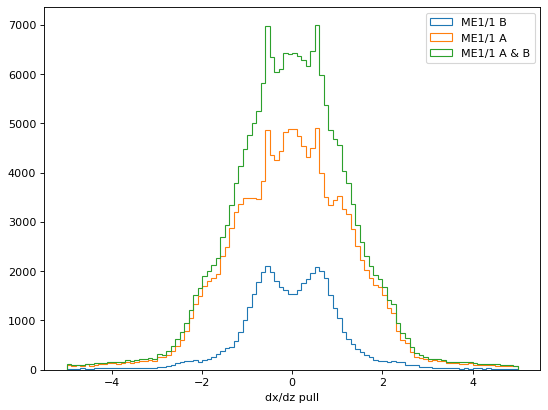

In [24]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

mask_hit = (hits_1.station == 1) & (hits_1.ring == 1) & (abs(muons_1.eta) > 2.0) & (abs(muons_1.eta) < 2.4) 
#mask_hit_xy = (abs(hits_1.x-segments_1.x)/abs(hits_1.x)< 0.01) & (abs(hits_1.y-segments_1.y)/abs(hits_1.y)< 0.01)

mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2)) #& (ak.num(hits_1[mask_hit_xy],axis=2)== ak.num(hits_1,axis =2) )

seg_skim_1 = segments_1[(mask_segment)]
hit_skim_1 = hits_1[mask_hit]

n, bins, _ = plt.hist(ak.flatten(seg_skim_1.pull[(seg_skim_1.dirxErr<10.) & (seg_skim_1.diryErr<10.) ]
                                 ,axis=None),label='ME1/1 B',histtype=("step"), bins=100,range=(-5,5))#,density = True)
print(sum(n))

mask_hit = (hits_1.station == 1) & (hits_1.ring == 4) & (abs(muons_1.eta) > 2.0) & (abs(muons_1.eta) < 2.4) 
#mask_hit_xy = (abs(hits_1.x-segments_1.x)/abs(hits_1.x)< 0.01) & (abs(hits_1.y-segments_1.y)/abs(hits_1.y)< 0.01)

mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2)) #& (ak.num(hits_1[mask_hit_xy],axis=2)== ak.num(hits_1,axis =2) )

seg_skim_1 = segments_1[(mask_segment)]
hit_skim_1 = hits_1[mask_hit]

n, bins, _ = plt.hist(ak.flatten(seg_skim_1.pull[(seg_skim_1.dirxErr<10.) & (seg_skim_1.diryErr<10.)]
                                 ,axis=None),label='ME1/1 A',histtype=("step"), bins=100,range=(-5,5))#,density = True)


mask_hit = (hits_1.station == 1) & ((hits_1.ring == 4) |(hits_1.ring == 1)) & (abs(muons_1.eta) > 2.0) & (abs(muons_1.eta) < 2.4) 
#mask_hit_xy = (abs(hits_1.x-segments_1.x)/abs(hits_1.x)< 0.01) & (abs(hits_1.y-segments_1.y)/abs(hits_1.y)< 0.01)

mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2)) #& (ak.num(hits_1[mask_hit_xy],axis=2)== ak.num(hits_1,axis =2) )

seg_skim_1 = segments_1[(mask_segment)]
hit_skim_1 = hits_1[mask_hit]

n, bins, _ = plt.hist(ak.flatten(seg_skim_1.pull[(seg_skim_1.dirxErr<10.) & (seg_skim_1.diryErr<10.)]
                                 ,axis=None),label='ME1/1 A & B',histtype=("step"), bins=100,range=(-5,5))#,density = True)


#plt.yscale('log')
plt.xlabel("dx/dz pull")
plt.legend()

23016.0


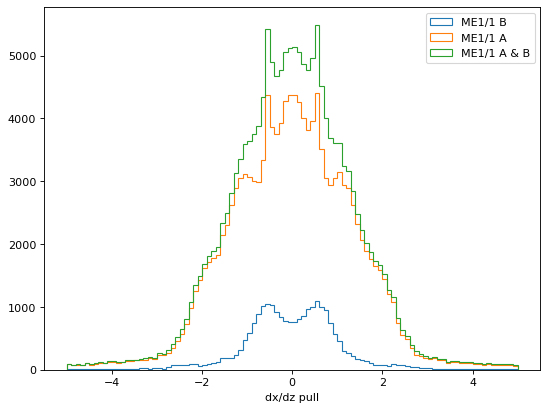

In [25]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

mask_hit = (hits_1.station == 1) & (hits_1.ring == 1) & ((hits_1.y > -25.0) | (hits_1.y < -35.0)) & (abs(muons_1.eta) > 2.0) & (abs(muons_1.eta) < 2.4) 
#mask_hit_xy = (abs(hits_1.x-segments_1.x)/abs(hits_1.x)< 0.01) & (abs(hits_1.y-segments_1.y)/abs(hits_1.y)< 0.01)

mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2)) #& (ak.num(hits_1[mask_hit_xy],axis=2)== ak.num(hits_1,axis =2) )

seg_skim_1 = segments_1[(mask_segment)]
hit_skim_1 = hits_1[mask_hit]

n, bins, _ = plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='ME1/1 B',histtype=("step"), bins=100,range=(-5,5))#,density = True)

print(sum(n))

mask_hit = (hits_1.station == 1) & (hits_1.ring == 4) & ((hits_1.y > -25.0) | (hits_1.y < -35.0)) & (abs(muons_1.eta) > 2.0) & (abs(muons_1.eta) < 2.4) 
#mask_hit_xy = (abs(hits_1.x-segments_1.x)/abs(hits_1.x)< 0.01) & (abs(hits_1.y-segments_1.y)/abs(hits_1.y)< 0.01)

mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2)) #& (ak.num(hits_1[mask_hit_xy],axis=2)== ak.num(hits_1,axis =2) )

seg_skim_1 = segments_1[(mask_segment)]
hit_skim_1 = hits_1[mask_hit]

n, bins, _ = plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='ME1/1 A',histtype=("step"), bins=100,range=(-5,5))#,density = True)


mask_hit = (hits_1.station == 1) & ((hits_1.ring == 4) |(hits_1.ring == 1)) & ((hits_1.y > -25.0) | (hits_1.y < -35.0)) & (abs(muons_1.eta) > 2.0) & (abs(muons_1.eta) < 2.4) 
#mask_hit_xy = (abs(hits_1.x-segments_1.x)/abs(hits_1.x)< 0.01) & (abs(hits_1.y-segments_1.y)/abs(hits_1.y)< 0.01)

mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2)) #& (ak.num(hits_1[mask_hit_xy],axis=2)== ak.num(hits_1,axis =2) )

seg_skim_1 = segments_1[(mask_segment)]
hit_skim_1 = hits_1[mask_hit]

n, bins, _ = plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='ME1/1 A & B',histtype=("step"), bins=100,range=(-5,5))#,density = True)


#plt.yscale('log')
plt.xlabel("dx/dz pull")
plt.legend()

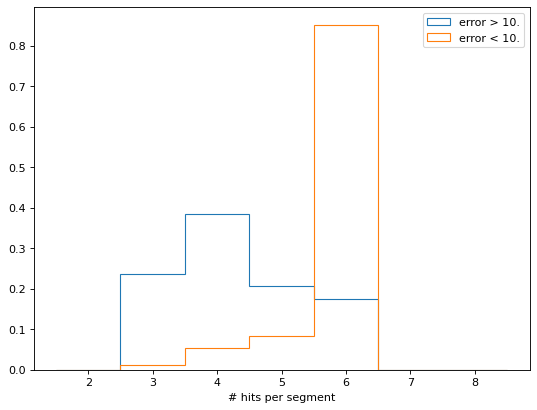

In [207]:
#mask_hit = (hits_1.station == 1) & (hits_1.ring == 1)
#mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
mask_segment1=segments_1.dirxErr > 10.0
mask_segment2=segments_1.dirxErr < 10.0
seg_skim_1 = segments_1[mask_segment1]
seg_skim_2 = segments_1[mask_segment2]
mask_muon1 = (ak.num(segments_1[mask_segment1],axis=1) > 0)
mask_muon2 = (ak.num(segments_1[mask_segment2],axis=1) > 0)
muon_skim_1 = muons_1[mask_muon1]
muon_skim_2 = muons_1[mask_muon2]
n, bins, _ = plt.hist(ak.flatten(seg_skim_1.nHits,axis=None),label='error > 10.',histtype=("step"), bins=7,range=(1.5,8.5),density = True)
n, bins, _ = plt.hist(ak.flatten(seg_skim_2.nHits,axis=None),label='error < 10.',histtype=("step"), bins=7,range=(1.5,8.5),density = True)
plt.xlabel('# hits per segment')
plt.legend()

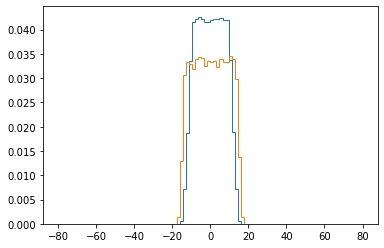

In [219]:
mask_segment1=segments_1.dirxErr > 10.0
mask_segment2=segments_1.dirxErr < 10.0
seg_skim_1 = segments_1[mask_segment1]
seg_skim_2 = segments_1[mask_segment2]
mask_hit_1 = (hits_1.station == 1) & (hits_1.ring == 1) & (hits_1.endcap == 1)
mask_hit_4 = (hits_1.station == 1) & (hits_1.ring == 4) & (hits_1.endcap == 1)

hit_skim_1_1 = hits_1[(mask_hit_1) & (mask_segment1)]
hit_skim_2_1 = hits_1[(mask_hit_1) & (mask_segment2)]

hit_skim_1_4 = hits_1[(mask_hit_4) & (mask_segment1)]
hit_skim_2_4 = hits_1[(mask_hit_4) & (mask_segment2)]

n, bins, _ = plt.hist(ak.flatten(hit_skim_1.x,axis=None),label='ME1/1 B',histtype=("step"), bins=100,range=(-80,80),density = True)
n, bins, _ = plt.hist(ak.flatten(hit_skim_2.x,axis=None),label='ME1/1 B',histtype=("step"), bins=100,range=(-80,80),density = True)

11921.0


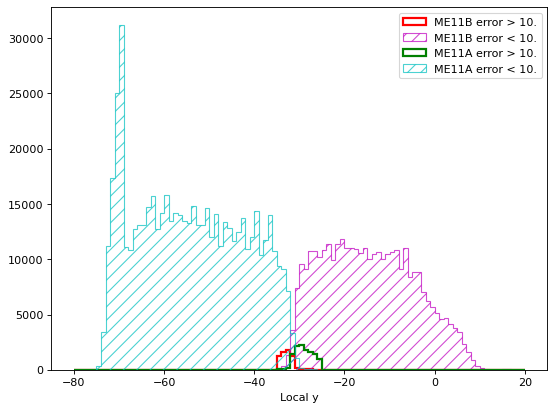

In [238]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

n1, bins1, _ = plt.hist(ak.flatten(hit_skim_1_1.y,axis=None),label='ME11B error > 10.',color='r',histtype=("step"), bins=100,range=(-80,20),linewidth=2)#,density = True)
n, bins, _ = plt.hist(ak.flatten(hit_skim_2_1.y,axis=None),label='ME11B error < 10.',color='m',histtype=("step"), bins=100,range=(-80,20),hatch='//',alpha=0.7)#,density = True)

n1, bins1, _ = plt.hist(ak.flatten(hit_skim_1_4.y,axis=None),label='ME11A error > 10.',color='g',histtype=("step"), bins=100,range=(-80,20),linewidth=2)#,density = True)
n, bins, _ = plt.hist(ak.flatten(hit_skim_2_4.y,axis=None),label='ME11A error < 10.',color='c',histtype=("step"), bins=100,range=(-80,20),hatch='//',alpha=0.7)#,density = True)
#plt.yscale('log')
plt.legend()
plt.xlabel('Local y')
print(sum(n1))

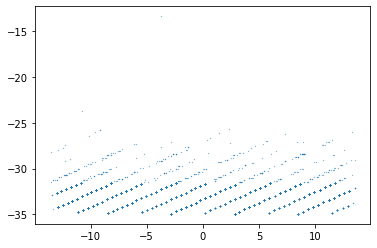

In [157]:
plt.scatter(ak.flatten(hit_skim_1.x,axis=None),ak.flatten(hit_skim_1.y,axis=None),s=0.05)

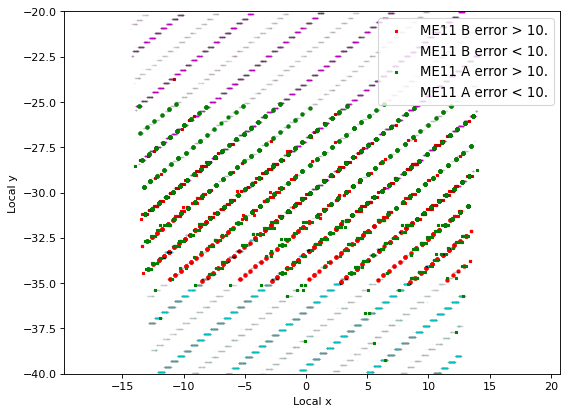

In [245]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.scatter(ak.flatten(hit_skim_1_1.x,axis=None),ak.flatten(hit_skim_1_1.y,axis=None), color='r',s=1,marker ="s",label ="ME11 B error > 10.")
plt.scatter(ak.flatten(hit_skim_2_1.x,axis=None),ak.flatten(hit_skim_2_1.y,axis=None),color='m',s=1,alpha = 0.005,label ="ME11 B error < 10.")

plt.scatter(ak.flatten(hit_skim_1_4.x,axis=None),ak.flatten(hit_skim_1_4.y,axis=None),s=1,color='g',marker ="s",label ="ME11 A error > 10.")
plt.scatter(ak.flatten(hit_skim_2_4.x,axis=None),ak.flatten(hit_skim_2_4.y,axis=None),s=1,color='c',alpha = 0.005,label ="ME11 A error < 10.")

plt.ylim(-40,-20)
plt.xlabel("Local x")
plt.ylabel("Local y")
plt.legend(prop={'size': 12}, loc = 'upper right')
plt.savefig('chameber_ME11_bigErr.pdf')

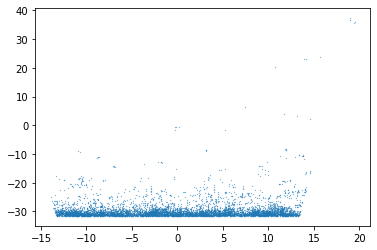

In [147]:
#plt.scatter(ak.flatten(hit_skim_2.xSim,axis=None),ak.flatten(hit_skim_2.ySim,axis=None),s=0.05)
plt.scatter(ak.flatten(hit_skim_1.xSim,axis=None),ak.flatten(hit_skim_1.ySim,axis=None),s=0.05)

(0.0, 1000.0)

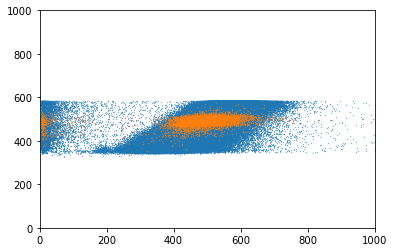

In [111]:
mask_segment1=segments_1.dirxErr > 10.0
mask_segment2=segments_1.dirxErr < 10.0
mask_muon1 = (ak.num(segments_1[mask_segment1],axis=1) > 0)
mask_muon2 = (ak.num(segments_1[mask_segment2],axis=1) > 0)
muon_skim_1 = muons_1[mask_muon1]
muon_skim_2 = muons_1[mask_muon2]
plt.scatter(muon_skim_2.pt,
            muon_skim_2.ptGen,
            label='ME1/1 ', s = 0.05)#,range=(0.0,.01))
plt.scatter(muon_skim_1.pt,
            muon_skim_1.ptGen,
            label='ME1/1 ', s = 0.05)#,range=(0.0,.01))

plt.xlim(0,1000)
plt.ylim(0,1000)

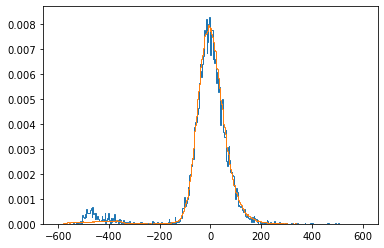

In [101]:
mask_segment1=segments_1.dirxErr > 10.0
mask_segment2=segments_1.dirxErr < 10.0
mask_muon1 = (ak.num(segments_1[mask_segment1],axis=1) > 0)
mask_muon2 = (ak.num(segments_1[mask_segment2],axis=1) > 0)
muon_skim_1 = muons_1[mask_muon1]
muon_skim_2 = muons_1[mask_muon2]
n, bins, _ = plt.hist((muon_skim_1.pt-muon_skim_1.ptGen),label='ME1/1 B',histtype=("step"), bins=400,range=(-600,600),density = True)
n, bins, _ = plt.hist((muon_skim_2.pt-muon_skim_2.ptGen),label='ME1/1 B',histtype=("step"), bins=400,range=(-600,600),density = True)

(array([ 8.,  7.,  6.,  6.,  5.,  3.,  7.,  5.,  7.,  7.,  6.,  5.,  2.,
         1.,  7.,  8.,  6.,  4.,  4.,  5.,  5.,  8., 12.,  9.,  9.,  1.,
        10.,  8., 10.,  6.,  8.,  9., 14.,  9.,  6.,  5.,  7., 16., 23.,
        13., 11., 10.,  8., 14., 12., 14.,  9., 18., 12., 10., 12., 10.,
        14., 12., 18., 19., 14.,  9., 10., 16., 13., 14., 10.,  7., 12.,
        13.,  5., 11., 10.,  3.,  4.,  4., 14.,  4.,  9.,  6.,  6.,  7.,
         8.,  7.,  5.,  7.,  6.,  6.,  2.,  3.,  9.,  7., 12.,  6.,  6.,
        10., 10.,  8.,  7.,  7., 10.,  1.,  8., 11.]),
 array([-2.00e-03, -1.96e-03, -1.92e-03, -1.88e-03, -1.84e-03, -1.80e-03,
        -1.76e-03, -1.72e-03, -1.68e-03, -1.64e-03, -1.60e-03, -1.56e-03,
        -1.52e-03, -1.48e-03, -1.44e-03, -1.40e-03, -1.36e-03, -1.32e-03,
        -1.28e-03, -1.24e-03, -1.20e-03, -1.16e-03, -1.12e-03, -1.08e-03,
        -1.04e-03, -1.00e-03, -9.60e-04, -9.20e-04, -8.80e-04, -8.40e-04,
        -8.00e-04, -7.60e-04, -7.20e-04, -6.80e-04, -6.40e-04, -

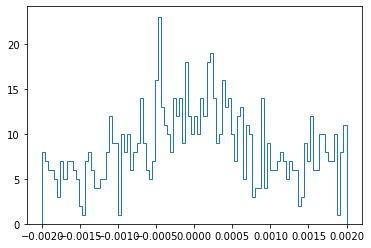

In [29]:
plt.hist(ak.flatten(seg_skim_1.pull,axis=None),label='ME1/1 B',histtype=("step"), bins=100,range=(-0.002,0.002))#,density = True)

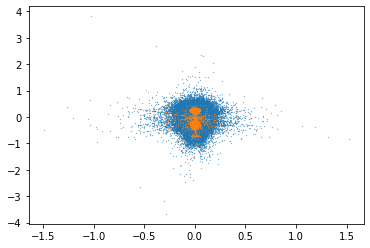

In [47]:

plt.scatter(ak.flatten(segments_1.dx[abs(segments_1.pull) > 0.002]/segments_1.dz[abs(segments_1.pull) > 0.002],axis=None),
            ak.flatten(segments_1.dy[abs(segments_1.pull) > 0.002]/segments_1.dz[abs(segments_1.pull) > 0.002],axis=None),
            label='ME1/1 A', s = 0.05)#,range=(0.0,.01))

plt.scatter(ak.flatten(segments_1.dx[abs(segments_1.pull) < 0.002]/segments_1.dz[abs(segments_1.pull) < 0.002],axis=None),
            ak.flatten(segments_1.dy[abs(segments_1.pull) < 0.002]/segments_1.dz[abs(segments_1.pull) < 0.002],axis=None),
            label='ME1/1 A',s = 0.05)#,range=(0.0,.01))

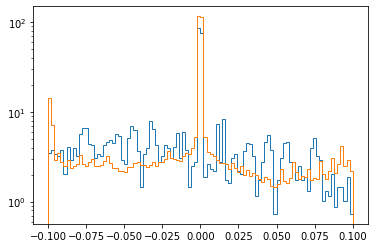

In [84]:
plt.hist(ak.flatten(segments_1.dy[abs(segments_1.dirxErr) > 10]/segments_1.dz[abs(segments_1.dirxErr) > 10.],axis=None),
         label='ME1/1 A',histtype=("step"), bins=100,range=(-0.1,0.1),density = True)
plt.hist(ak.flatten(segments_1.dy[abs(segments_1.dirxErr) < 10]/segments_1.dz[abs(segments_1.dirxErr) < 10],axis=None),
         label='ME1/1 A',histtype=("step"), bins=100,range=(-0.1,0.1),density = True)
plt.yscale('log')

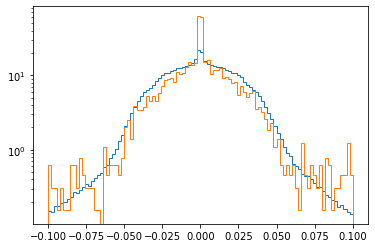

In [53]:
plt.hist(ak.flatten(segments_1.dx[abs(segments_1.pull) > 0.002],axis=None),
         label='ME1/1 A',histtype=("step"), bins=100,range=(-0.1,0.1),density = True)
plt.hist(ak.flatten(segments_1.dx[abs(segments_1.pull) < 0.002],axis=None),
         label='ME1/1 A',histtype=("step"), bins=100,range=(-0.1,0.1),density = True)
plt.yscale('log')

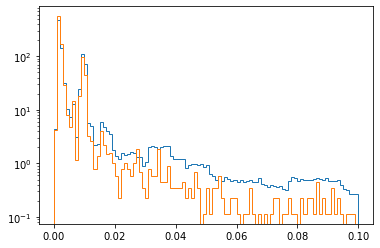

In [58]:
plt.hist(ak.flatten(segments_1.diryErr[abs(segments_1.pull) > 0.01],axis=None),
         label='ME1/1 A',histtype=("step"), bins=100,range=(0.0,0.1),density = True)
plt.hist(ak.flatten(segments_1.diryErr[abs(segments_1.pull) < 0.01],axis=None),
         label='ME1/1 A',histtype=("step"), bins=100,range=(0.0,0.1),density = True)
plt.yscale('log')

(-0.5, 0.5)

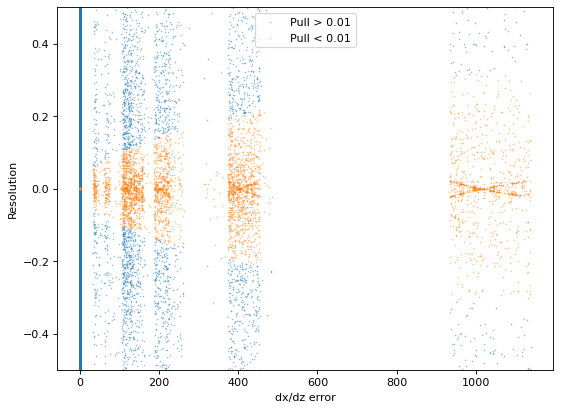

In [203]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(ak.flatten(segments_1.dirxErr[(abs(segments_1.pull) > 0.01)],axis=None),
            ak.flatten(segments_1.res[(abs(segments_1.pull) > 0.01)],axis=None),
            label='Pull > 0.01', s = 0.05)#,range=(0.0,.01)

plt.scatter(ak.flatten(segments_1.dirxErr[abs(segments_1.pull) < 0.01],axis=None),
            ak.flatten(segments_1.res[abs(segments_1.pull) < 0.01],axis=None),
            label='Pull < 0.01', s = 0.05)#,range=(0.0,.01))

#plt.xscale('log')
plt.xlabel('dx/dz error')
plt.ylabel('Resolution')
plt.legend(loc='upper center')
plt.ylim(-0.5,0.5)

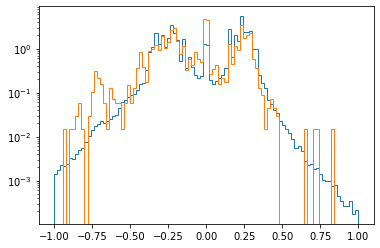

In [51]:
plt.hist(ak.flatten(segments_1.dy[abs(segments_1.pull) > 0.002]/segments_1.dz[abs(segments_1.pull) > 0.002],axis=None),
         label='ME1/1 A',histtype=("step"), bins=100,range=(-1.,1),density = True)
plt.hist(ak.flatten(segments_1.dy[abs(segments_1.pull) < 0.002]/segments_1.dz[abs(segments_1.pull) < 0.002],axis=None),
         label='ME1/1 A',histtype=("step"), bins=100,range=(-1.,1),density = True)
plt.yscale('log')

Text(0, 0.5, 'Station')

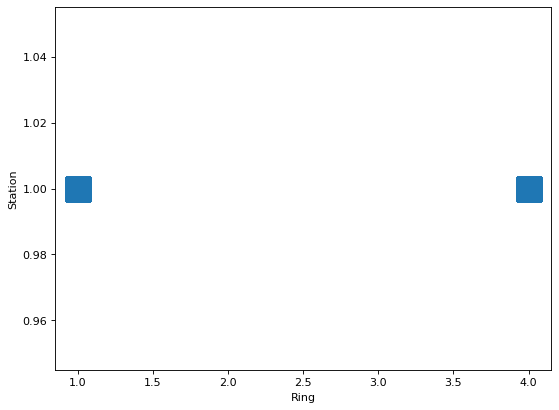

In [217]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.scatter(ak.flatten(hits_1.ring[abs(segments_1.dirxErr) >10.],axis=None), (ak.flatten(hits_1.station[abs(segments_1.dirxErr) >10.],axis=None)), marker ='s', s = 500)
#plt.hist(ak.flatten(hits_1.ring[abs(segments_1.dirxErr) >10.],axis=None),label='ME1/1 A',histtype=("step"), bins=5,range=(0.5,5.5),density = True)
plt.xlabel('Ring')
plt.ylabel('Station')

(array([1., 0., 0., 0., 0.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [<matplotlib.patches.Polygon at 0x7f0f63ed97c0>])

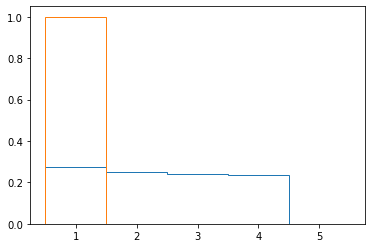

In [165]:
plt.hist(ak.flatten(hits_1.station[abs(segments_1.dirxErr) <10.],axis=None),label='ME1/1 A',histtype=("step"), bins=5,range=(0.5,5.5),density = True)
plt.hist(ak.flatten(hits_1.station[abs(segments_1.dirxErr) > 10.],axis=None),label='ME1/1 A',histtype=("step"), bins=5,range=(0.5,5.5),density = True)

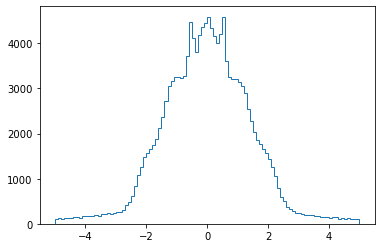

In [55]:
mask_hit = (hits_1.station == 1) & (hits_1.ring == 4) & (abs(muons_1.eta) > 2.0) & (abs(muons_1.eta) < 2.4) 
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_1 = segments_1[(mask_segment)]
hit_skim_1 = hits_1[mask_hit]
mask_muon = (ak.num(segments_1[mask_segment],axis=1) > 0)
muon_skim_1 = muons_1[mask_muon]
n, bins, _ = plt.hist(ak.flatten(seg_skim_1.pull[seg_skim_1.dirxErr<10],axis=None),label='ME1/1',histtype=("step"), bins=100,range=(-5,5))#,density = True)
#plt.yscale('log')

Text(0.5, 0, 'Error')

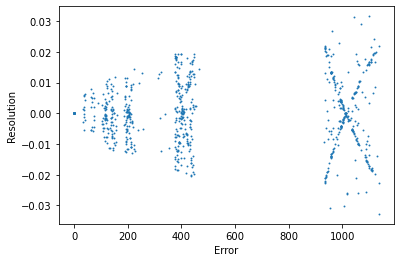

In [45]:

plt.scatter(np.array(ak.flatten(seg_skim_1.dirxErr[abs(seg_skim_1.pull)<0.001],axis=None)), np.array(ak.flatten(seg_skim_1.res[abs(seg_skim_1.pull)<0.001],axis=None)),s = 0.8)
plt.ylabel("Resolution")
plt.xlabel("Error")

In [42]:
ak.flatten(seg_skim_1.dirxErr[(seg_skim_1.pull>-0.001) & (seg_skim_1.pull<0.001) ])

<Array [1.1e+03, 113, 959, ... 1.08e+03, 436] type='761 * float64'>

(array([37.,  0.,  0.,  0.,  0.,  0.,  9.,  3.,  0.,  0.,  1.,  7.,  4.,
         3.,  0.,  1.,  0.,  0.,  6.,  8., 21., 10.,  4.,  3., 15., 14.,
         7.,  4.,  2.,  0.,  0.,  0.,  1., 12., 27., 15., 11., 12.,  5.,
         4.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         1., 27., 20., 27., 13., 24., 12.,  6., 10., 16.,  6., 27., 12.,
         9.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12., 10.,  6., 22.,
         5., 14.,  5.,  4.,  6., 15., 21., 15.,  5.

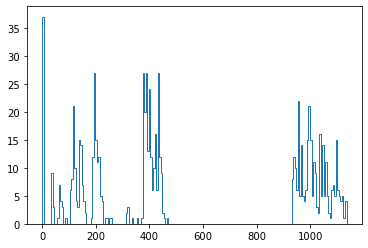

In [43]:
 plt.hist(ak.flatten(seg_skim_1.dirxErr[(seg_skim_1.pull>-0.001) & (seg_skim_1.pull<0.001)]),histtype=("step"), bins=200)

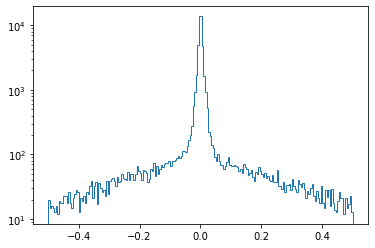

In [25]:
plt.hist(ak.flatten(seg_skim_1.res,axis=None),label='ME1/1',histtype=("step"), bins=200,range=(-0.5,0.5))#,density = True)
plt.yscale('log')

In [113]:
sum(n)

2085.0

In [80]:
ak.num(segments_1,axis=1)

<Array [3, 4, 3, 3, 3, 3, ... 1, 3, 4, 4, 4, 3] type='40423 * int64'>

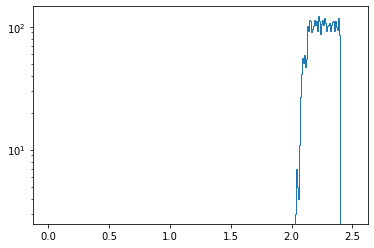

In [100]:
plt.hist(muon_skim_1.eta,label='ME1/1',histtype=("step"), bins=300,range=(0,2.5))#,density = True)
plt.yscale('log')

 FCN=100.217 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=4.41737e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.32526e+02   5.02888e+00   2.02819e-02   6.79519e-06
   2  Mean        -2.18470e-02   1.52924e-02   7.50975e-05  -3.04559e-04
   3  Sigma        1.18034e+00   1.10883e-02   1.28234e-05   8.80634e-03


/eos/user/p/pmastrap/.local/lib/python3.9/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
Warning in <TROOT::Append>: Replacing existing TH1: Station 1, Ring 1 A (Potential memory leak).


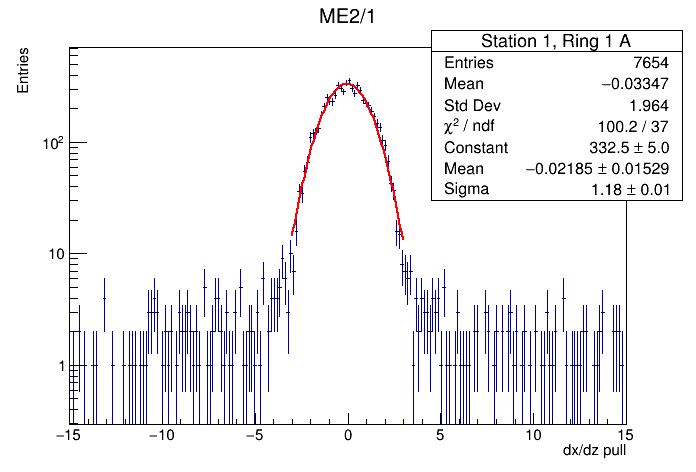

In [166]:
histo = ROOT.TH1D("Station 1, Ring 1 A","ME2/1",200,-15,15)
histo.Sumw2()
fill_hist(histo, np.array(ak.flatten(seg_skim_1.pull,axis=None)))
c1 = ROOT.TCanvas()
histo.Draw()
histo.Fit("gaus","","",-3,3)
histo.GetXaxis().SetTitle("dx/dz pull");
histo.GetYaxis().SetTitle("Entries");
c1.SetLogy()
ROOT.gStyle.SetOptStat();
ROOT.gStyle.SetOptFit()
c1.Draw()

 FCN=124.587 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=1.54342e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.61667e+03   2.80365e+01   1.11884e-01   2.60327e-05
   2  Mean        -1.33086e-04   1.02254e-04   5.58991e-07  -1.43994e+00
   3  Sigma        7.78289e-03   9.94343e-05   1.72690e-05   1.27466e-01


/eos/user/p/pmastrap/.local/lib/python3.9/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
Warning in <TROOT::Append>: Replacing existing TH1: Station 1, Ring 1 A (Potential memory leak).
Info in <TCanvas::Print>: pdf file ./Resolution.pdf has been created


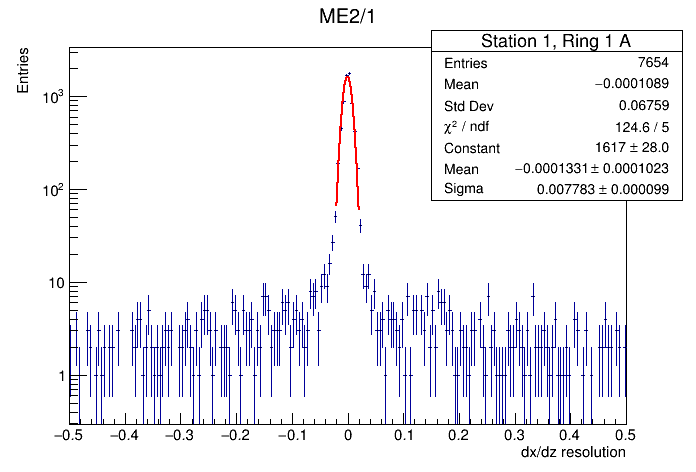

In [170]:
histo = ROOT.TH1D("Station 1, Ring 1 A","ME2/1",200,-0.5,0.5)
histo.Sumw2()
fill_hist(histo, np.array(ak.flatten(seg_skim_1.res,axis=None)))
c1 = ROOT.TCanvas()
histo.Draw()
histo.Fit("gaus","","",-0.02,0.02)
histo.GetXaxis().SetTitle("dx/dz resolution");
histo.GetYaxis().SetTitle("Entries");
c1.SetLogy()
ROOT.gStyle.SetOptStat();
ROOT.gStyle.SetOptFit()
c1.Draw()
c1.SaveAs("./Resolution.pdf")

In [167]:
histo2 = ROOT.TH2D("Station 1, Ring 1","ME2/1 correlation",120,-0.05,0.05,120,0,0.03)
histo2.Sumw2()

for x,y in zip(np.array(ak.flatten(seg_skim_1.res,axis=None)),np.array(ak.flatten(seg_skim_1.pull,axis=None))):
    histo2.Fill(x,x/y)

Warning in <TROOT::Append>: Replacing existing TH1: Station 1, Ring 1 (Potential memory leak).


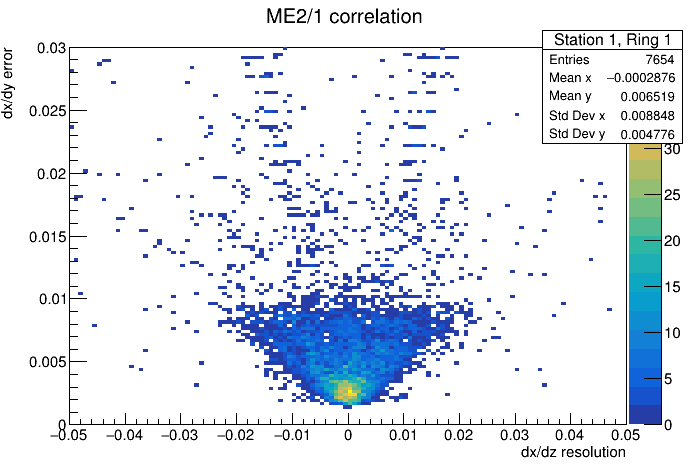

In [168]:
c2 = ROOT.TCanvas()
histo2.Draw("colz")
histo2.GetXaxis().SetTitle("dx/dz resolution");
histo2.GetYaxis().SetTitle("dx/dy error");
c2.Draw()

In [142]:
mask_hit = ((hits_1.ring == 1)) & (hits_1.station == 2) & (hits_1.endcap == 1)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_2 = segments_1[mask_segment]
hit_skim_2 = hits_1[mask_hit]

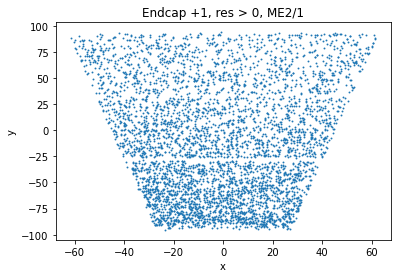

In [144]:
plt.scatter(np.array(ak.flatten(seg_skim_2[seg_skim_2.res >0.].x,axis=None)), np.array(ak.flatten(seg_skim_2[seg_skim_2.res >0.].y,axis=None)),s = 0.8)
#plt.ylim(-40,110)
#plt.xlim(-50,50)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Endcap +1, res > 0, ME2/1")
plt.savefig("./endcap1pos_corrxy.pdf")

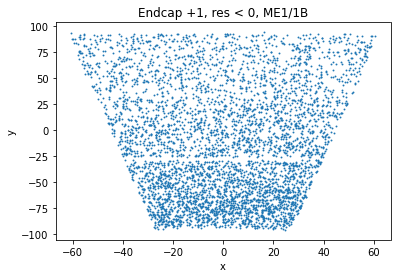

In [145]:
plt.scatter(np.array(ak.flatten(seg_skim_2[seg_skim_2.res <0.].x,axis=None)), np.array(ak.flatten(seg_skim_2[seg_skim_2.res <0.].y,axis=None)),s = 0.8)
#plt.ylim(-40,110)
#plt.xlim(-50,50)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Endcap +1, res < 0, ME1/1B")
plt.savefig("./endcap1neg_corrxy.pdf")

In [128]:
mask_hit = ((hits_1.ring == 1)) & (hits_1.station == 1) & (hits_1.endcap == -1)
mask_segment = (ak.num(hits_1[mask_hit],axis=2) == ak.num(hits_1,axis =2))
seg_skim_3 = segments_1[mask_segment]
hit_skim_3 = hits_1[mask_hit]

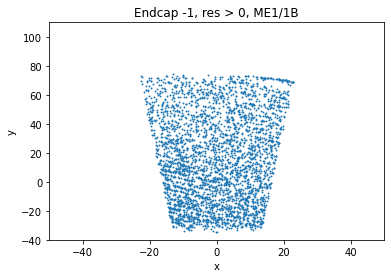

In [129]:
plt.scatter(np.array(ak.flatten(seg_skim_3[seg_skim_3.res >0.].x,axis=None)), np.array(ak.flatten(seg_skim_3[seg_skim_3.res >0.].y,axis=None)),s = 0.8)
plt.ylim(-40,110)
plt.xlim(-50,50)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Endcap -1, res > 0, ME1/1B")
plt.savefig("./endcap-1pos_corrxy.pdf")

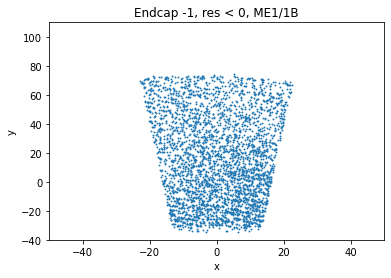

In [130]:
plt.scatter(np.array(ak.flatten(seg_skim_3[seg_skim_3.res <0.].x,axis=None)), np.array(ak.flatten(seg_skim_3[seg_skim_3.res <0.].y,axis=None)),s = 0.8)
plt.ylim(-40,110)
plt.xlim(-50,50)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Endcap -1, res < 0, ME1/1B")
plt.savefig("./endcap-11neg_corrxy.pdf")